# Patient Health Risk Prediction: Diabetes Health Indicators Dataset

## Data Preprocessing and EDA

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [9]:
# Check data types and non-zero values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

253680 entries and 253680 non-null values each column, which means there is no null value. All values are float64.

In [10]:
# Count numbers of 0 (non-diabetic) vs 1 (diabetic)
# normalize=True give percentage
print(df['Diabetes_binary'].value_counts(normalize=True))

Diabetes_binary
0.0    0.860667
1.0    0.139333
Name: proportion, dtype: float64


86.1% non diabetics and 13.9% diabetics ==> imbalanced dataset.

In [11]:
# Get descriptive stats
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64


C:\Users\grego\AppData\Local\Temp\ipykernel_7756\4223840596.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values[1:], y=corr_target.index[1:], palette='coolwarm') # [1:] to exclude target's correlation with itself


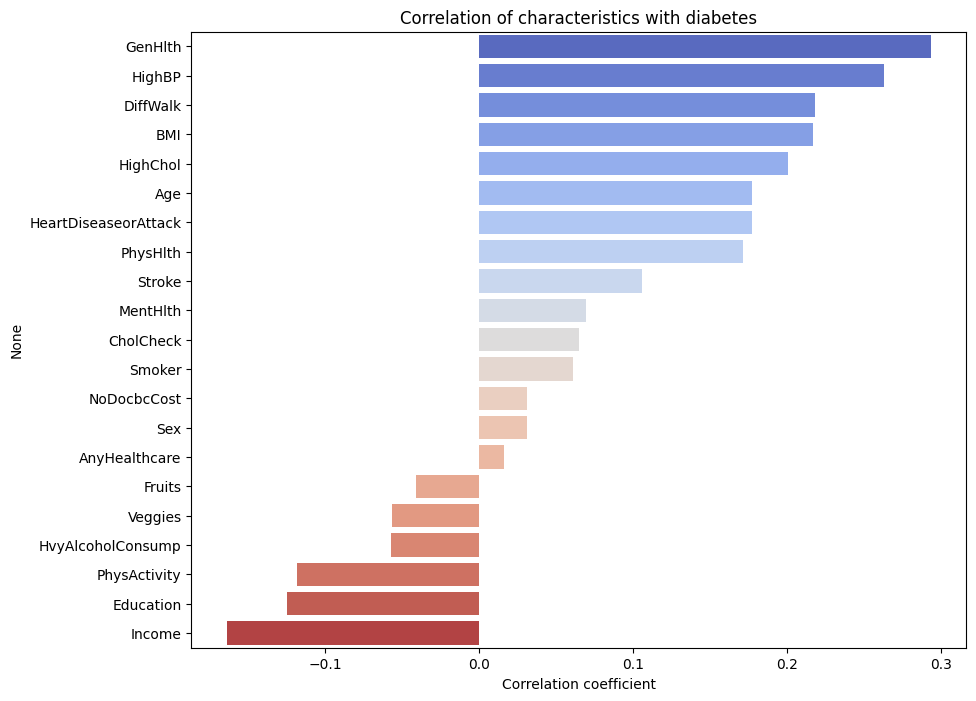

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df.corr()

# Isolate correlations with 'Diabetes_binary' target variable
corr_target = corr_matrix['Diabetes_binary'].sort_values(ascending=False)

# Print correlations
print(corr_target)

# Visualize correlations with a plot
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_target.values[1:], y=corr_target.index[1:], palette='coolwarm') # [1:] to exclude target's correlation with itself
plt.title('Correlation of characteristics with diabetes')
plt.xlabel('Correlation coefficient')
plt.show()

People who evaluate their health as "bad", have high blood pressure and have difficulty to walk, are the most likely to be diabetic.

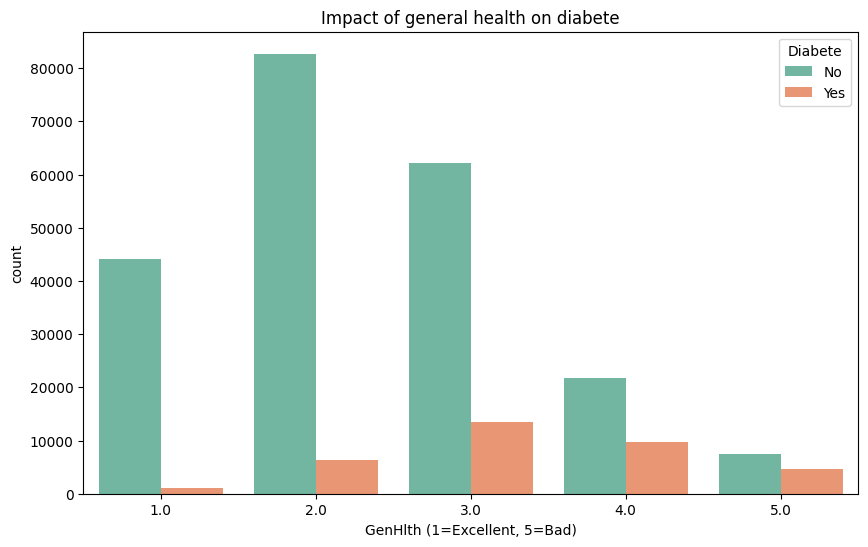

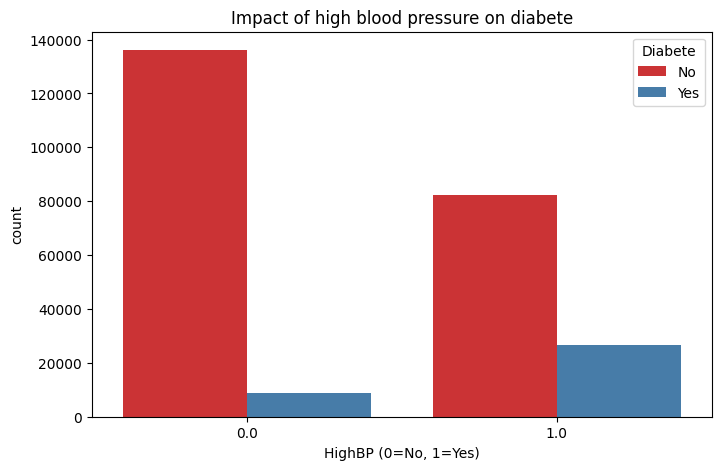

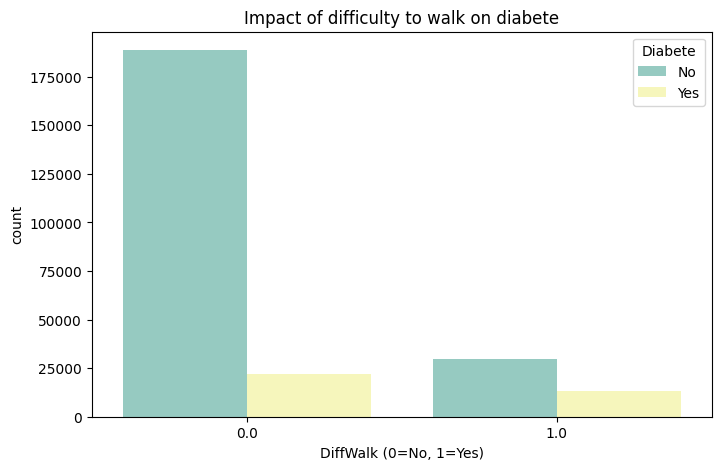

In [13]:
# GenHlth Visualization
# Most important variable
plt.figure(figsize=(10, 6))
sns.countplot(x='GenHlth', hue='Diabetes_binary', data=df, palette='Set2')
plt.title('Impact of general health on diabete')
plt.xlabel('GenHlth (1=Excellent, 5=Bad)')
plt.legend(title='Diabete', labels=['No', 'Yes'])
plt.show()

# HighBP Visualization
plt.figure(figsize=(8, 5))
sns.countplot(x='HighBP', hue='Diabetes_binary', data=df, palette='Set1')
plt.title('Impact of high blood pressure on diabete')
plt.xlabel('HighBP (0=No, 1=Yes)')
plt.legend(title='Diabete', labels=['No', 'Yes'])
plt.show()

# DiffWalk Visualization
plt.figure(figsize=(8, 5))
sns.countplot(x='DiffWalk', hue='Diabetes_binary', data=df, palette='Set3')
plt.title('Impact of difficulty to walk on diabete')
plt.xlabel('DiffWalk (0=No, 1=Yes)')
plt.legend(title='Diabete', labels=['No', 'Yes'])
plt.show()

Here we can see the proportion of diabetics for each variable (GenHlth, HighBP and DiffWalk).

Now, the model must learn to predict 'Diabete_binary' (Y) based on the rest of the data (X)

In [14]:
# 'X' contains all the columns except the target
X = df.drop('Diabetes_binary', axis=1)

# 'y' contains only the target column
y = df['Diabetes_binary']

We need to put aside a part of the data (the test set) to evaluate the model. 80% for training and 20% for testing.

In [15]:
from sklearn.model_selection import train_test_split

# Divide data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,    # 20% for test
    random_state=42,  # Reproducible results
    stratify=y        # Needed for imbalanced data
)

We need now to use StandardScaler of scikit-learn to scale the data

In [16]:
from sklearn.preprocessing import StandardScaler
# Initialize scaler
scaler = StandardScaler()

# Adapt scaler only on X_train
scaler.fit(X_train)

# Scale X_train and X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training, Comparison, and Ensemble

We need to tell the model that our data is imbalanced. In fact: we have a 86/14 ratio. We'll use the class_weight='balanced' parameter.

### First model: Logistic regression

It's a simple, fast and interpretable model.

In [17]:
from sklearn.linear_model import LogisticRegression

# Initialize model
# class_weight='balanced' is the key to generate the imbalance
# max_iter=1000 is to ensure the model converges
model_lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Train the model
print("Training of logistic regression...")
model_lr.fit(X_train_scaled, y_train)
print("Training ended.")

Training of logistic regression...
Training ended.


### Second model: Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
# n_estimators=100 means the model will build 100 trees
# class_weight='balanced' to generate the imbalance
model_rf = RandomForestClassifier(
    n_estimators=100, 
    class_weight='balanced', 
    random_state=42, 
    n_jobs=4  # Use all the processors to speed up.
)

# Train the model
print("Training of random forest...")
model_rf.fit(X_train_scaled, y_train)
print("Training ended.")

Training of random forest...
Training ended.


## Evaluation Metrics and Analysis

Let's see which model is the best

We need to calculate metrics like ROC, AUC, accuracy, precision, recall, and F1-score.

The accuracy will not be reliable due to the imbalance

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test_scaled)

# Show classification report
print("--- Results of logistic regression ---")
print(classification_report(y_test, y_pred_lr, target_names=['Non-Diabetic (0)', 'Diabetic (1)']))

print("\n--- Results of random forest ---")
print(classification_report(y_test, y_pred_rf, target_names=['Non-Diabetic (0)', 'Diabetic (1)']))

# 3. Calculate AUC (Area Under the Curve)
auc_lr = roc_auc_score(y_test, model_lr.predict_proba(X_test_scaled)[:, 1])
auc_rf = roc_auc_score(y_test, model_rf.predict_proba(X_test_scaled)[:, 1])

print("\n--- AUC Score ---")
print(f"Logistic regression AUC: {auc_lr:.4f}")
print(f"Random forest AUC: {auc_rf:.4f}")

--- Results of logistic regression ---
                  precision    recall  f1-score   support

Non-Diabetic (0)       0.95      0.73      0.82     43667
    Diabetic (1)       0.31      0.76      0.44      7069

        accuracy                           0.73     50736
       macro avg       0.63      0.74      0.63     50736
    weighted avg       0.86      0.73      0.77     50736


--- Results of random forest ---
                  precision    recall  f1-score   support

Non-Diabetic (0)       0.88      0.97      0.92     43667
    Diabetic (1)       0.47      0.16      0.24      7069

        accuracy                           0.86     50736
       macro avg       0.67      0.57      0.58     50736
    weighted avg       0.82      0.86      0.83     50736

--- AUC Score ---
Logistic regression AUC: 0.8196
Random forest AUC: 0.7922


Note: we use predict_proba() here because AUC needs probabilities rather than a simple prediction 0 or 1

AUC is an excellent metric to imbalanced problems. It show the capacity of the model to class patients. Score of 1 is perfect while score of 0.5 is useless.

The recall is the most important metric for a health problem.
On all the patients that are diabetics, how much our model did success to find them:
- 0.76 (logistic regression)
- 0.16 (random forest)

The accuracy is not accurate because the random forest model just predict the non-diabetic people. That's why it has 86% accuracy (the data is 86/14 ratio).

AUC for:
- LR: 82%
- RF: 79%

We can conclude by saying Logistic regression model is way better than Random forest one.

## Interpretability and Explainability

Compute of shap values (fast method)...
Compute ended.
Showing graph (Beeswarm)...


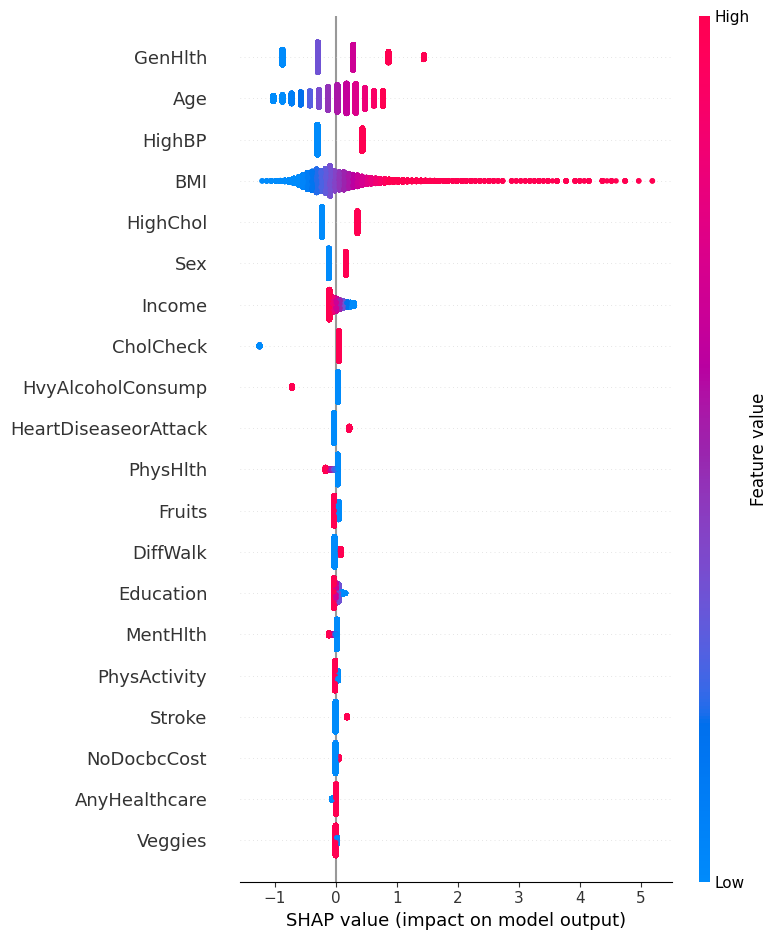

In [20]:
import shap

# Use linear explainer
explainer = shap.LinearExplainer(model_lr, X_train_scaled)

# Calculate shap values
print("Compute of shap values (fast method)...")
shap_values = explainer.shap_values(X_test_scaled)
print("Compute ended.")

# Convert X_test_scaled to dataframe for the graph
# Wee need the column names
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Show the graph (Beeswarm)
print("Showing graph (Beeswarm)...")
shap.summary_plot(shap_values, X_test_df, plot_type="dot")

For GenHlth: High values have positive SHAP values, strongly pushing the prediction towards "Diabetic". This makes sense.

For Age: High values push the prediction towards "Diabetic".

For HighBP: High values (Red, meaning "Yes, I have hypertension") push the prediction towards "Diabetic".

## Docker Deployment

In [21]:
import joblib

# Save logistic regression model
joblib.dump(model_lr, 'diabetes_model.pkl')

# Save scaler (very important!)
# API will scale the data the same way
joblib.dump(scaler, 'scaler.pkl')

print("Model 'diabetes_model.pkl' and Scaler 'scaler.pkl' saved.")

Model 'diabetes_model.pkl' and Scaler 'scaler.pkl' saved.


## Performance Tracking with MLflow

In [22]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score

# Define experience name
mlflow.set_experiment("Diabetes_Risk_Prediction")

# Start to record
with mlflow.start_run(run_name="LogisticRegression_Final"):

    # Save parameters
    # Model configurations
    mlflow.log_param("model_type", "LogisticRegression")
    mlflow.log_param("class_weight", "balanced")
    mlflow.log_param("random_state", 42)
    mlflow.log_param("python_version", "3.11")

    # Recalculate and save metrics
    # We use test data to evaluate
    y_pred_lr = model_lr.predict(X_test_scaled)
    y_probs_lr = model_lr.predict_proba(X_test_scaled)[:, 1]
    
    auc = roc_auc_score(y_test, y_probs_lr)
    f1 = f1_score(y_test, y_pred_lr)
    recall = recall_score(y_test, y_pred_lr)
    accuracy = accuracy_score(y_test, y_pred_lr)

    print(f"Logging metrics: AUC={auc:.4f}, F1={f1:.4f}, Recall={recall:.4f}")
    mlflow.log_metric("auc", auc)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("accuracy", accuracy)

    # Save files
    print("Logging artifacts...")
    mlflow.log_artifact("diabetes_model.pkl")
    mlflow.log_artifact("scaler.pkl")

    # (Optionnel) Enregistrer le modèle au format MLflow standard
    mlflow.sklearn.log_model(model_lr, "model")

print("Sucess!")

C:\Users\grego\OneDrive\Documents\EFREI\SEMESTRE 5 - CONCORDIA\folder\MACHINE-LEARNING-Project\venv\Lib\site-packages\mlflow\tracking\_tracking_service\utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)
2025/12/02 14:44:02 INFO mlflow.tracking.fluent: Experiment with name 'Diabetes_Risk_Prediction' does not exist. Creating a new experiment.
2025/12/02 14:44:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logging metrics: AUC=0.8196, F1=0.4413, Recall=0.7611
Logging artifacts...


2025/12/02 14:44:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Sucess!
